# 逻辑回归（Logistic Regression）深度解读

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 生成模拟数据（1000 个样本，5 个特征）,n_samples表示样本数，n_features表示特征数,random_state表示随机种子
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测
accuracy = model.score(X_test, y_test)
print("模型准确率:", accuracy)


模型准确率: 0.88


## 1. 可视化 Sigmoid 函数
Sigmoid 函数是逻辑回归的核心，它将输入值转换成 0 到 1 之间的概率。

可视化效果：

- Sigmoid 函数把输入 z 变换到 (0,1) 之间。
- 当z = 0, 输出为 0.5。
- 这个函数决定了逻辑回归如何分类。

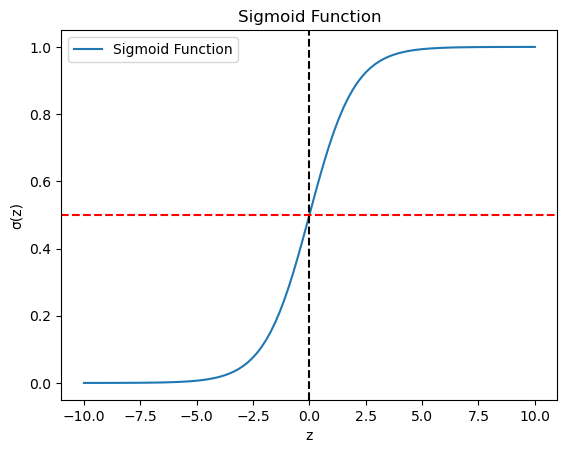

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 生成 z 值
z = np.linspace(-10, 10, 100)
sigma = sigmoid(z)

# 画出 Sigmoid 函数曲线
plt.plot(z, sigma, label="Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid Function")
plt.axvline(0, color='black', linestyle='--')  # z=0 的位置
plt.axhline(0.5, color='red', linestyle='--')  # 概率=0.5 的位置
plt.legend()
plt.show()


## 2. 逻辑回归的决策边界
逻辑回归的决策边界是一个直线（对于 2D 数据），它把数据分成两个类别。

可视化效果：
- 颜色表示类别 0 和 1。
- 逻辑回归学习到的决策边界是一条直线。
- 直线把两个类别的数据点尽量分开。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 生成 2D 分类数据
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# 训练逻辑回归模型
model = LogisticRegression()
model.fit(X, y)

# 画出数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

# 画出决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # 画出背景颜色
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()


## 3. 逻辑回归的损失函数变化

逻辑回归的优化过程是用梯度下降算法最小化损失函数。我们可以绘制损失值随迭代次数的变化情况。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss

# 生成 2D 数据
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# 训练逻辑回归，并记录损失
model = LogisticRegression(max_iter=1, solver='lbfgs')  # 初始 max_iter 设为 1
losses = []

for i in range(1, 101):  # 训练 100 次
    model.set_params(max_iter=i)
    model.fit(X, y)
    # 手动计算对数损失
    y_pred_proba = model.predict_proba(X)
    loss = log_loss(y, y_pred_proba)
    losses.append(loss)

# 画出损失函数下降曲线
plt.plot(range(1, 101), losses, marker='o', linestyle='-')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Function Curve")
plt.show()

## 4. 高维数据的决策边界

对于高维数据，我们可以用等高线图（contour）来可视化逻辑回归的分类效果。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 生成 2D 数据
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# 训练逻辑回归
model = LogisticRegression()
model.fit(X, y)

# 生成等高线网格
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 画出数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

# 画出决策边界
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary with Contour")
plt.show()
